In [1]:
# 기본 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn as sk
import statsmodels.api as sm
import scipy
import pickle

In [2]:
# matplotlib 사용 시 한글 깨짐 문제 해결
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/NGULIM.ttf"
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [3]:
# 경고 메시지 비활성화
import warnings

warnings.filterwarnings("ignore")

In [4]:
# 경로 확인
path = os.getcwd()
print(path)

C:\Users\lsc\Desktop\ADP


# 기출동형 모의고사 2회 (p407~)

## 머신러닝 (50점)

### 1. 데이터 탐색

(1) EDA (시각화 포함)  
(2) 이상치 처리  
(3) Insight

In [7]:
dia = pd.read_csv('./ADP_20230521/diabetes_for_test.csv')
dia.columns = ['preg', 'gluc', 'blood', 'skin', 'insulin', 'bmi', 'dpf', 'age', 'outcome']

dia.head(5)

,preg,gluc,blood,skin,insulin,bmi,dpf,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   preg     768 non-null    int64  
 1   gluc     768 non-null    int64  
 2   blood    768 non-null    int64  
 3   skin     768 non-null    int64  
 4   insulin  768 non-null    int64  
 5   bmi      768 non-null    float64
 6   dpf      768 non-null    float64
 7   age      768 non-null    int64  
 8   outcome  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
# 1. 데이터 요약
round(dia.describe(), 2)

,preg,gluc,blood,skin,insulin,bmi,dpf,age,outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,36.98,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,61.40,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,999.00,1.00


In [13]:
# 결측치 유무 파악 (Optional)
dia.isnull().sum()

preg       0
gluc       0
blood      0
skin       0
insulin    0
bmi        0
dpf        0
age        0
outcome    0
dtype: int64

In [32]:
dia['outcome'].value_counts()
    # 당뇨병 환자가 268명으로, 전체의 약 35%를 차지한다.
    # 좀 불균형하네. 심하지는 않다.

0    500
1    268
Name: outcome, dtype: int64

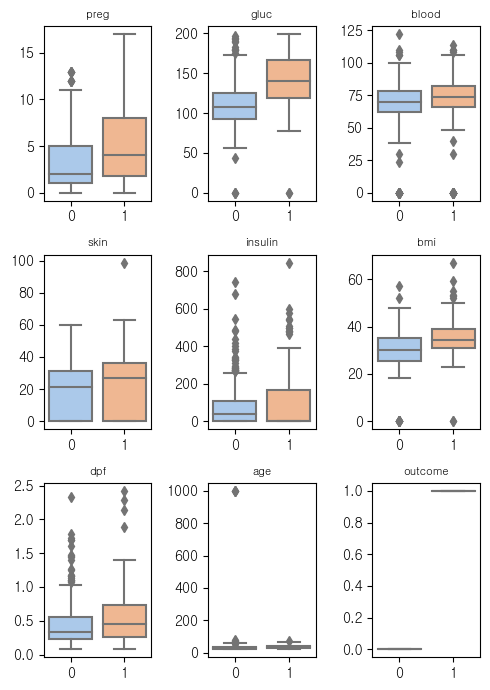

In [34]:
# 2. 분포도 및 상관관계 시각화
fig = plt.figure(figsize = (5, 7))

for i in range(len(dia.columns)) :
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x = 'outcome', y = dia.columns[i], data = dia, palette = 'pastel')
    plt.title(dia.columns[i], fontsize = 8)
    plt.xlabel("")
    plt.ylabel("")
    
plt.tight_layout()
plt.show()

In [65]:
# Boxplot만 보면 preg, gluc 등의 변수에서 그룹별로 분포 차이가 난다는 것을 알 수 있다.
# 변수별로 상관관계를 알아보자.
round(dia.corr(), 3)

,preg,gluc,blood,skin,insulin,bmi,dpf,age,outcome
preg,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.155,0.222
gluc,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.019,0.467
blood,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.060,0.065
skin,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.072,0.075
insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.050,0.131
bmi,0.018,0.221,0.282,0.393,0.198,1.000,0.141,-0.097,0.293
dpf,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,-0.014,0.174
age,0.155,0.019,0.060,-0.072,-0.050,-0.097,-0.014,1.000,0.001
outcome,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.001,1.000


In [93]:
for col in dia.columns :
    print(dia.corr()[col].min())
    print(dia.corr()[col].index[dia.corr()[col] == dia.corr()[col].min()])

-0.08167177444900726
Index(['skin'], dtype='object')
0.019351179610026862
Index(['age'], dtype='object')
0.04126494793009856
Index(['dpf'], dtype='object')
-0.08167177444900726
Index(['preg'], dtype='object')
-0.07353461435162822
Index(['preg'], dtype='object')
-0.09730722090117339
Index(['age'], dtype='object')
-0.03352267296261304
Index(['preg'], dtype='object')
-0.09730722090117339
Index(['bmi'], dtype='object')
0.0010343360460124973
Index(['age'], dtype='object')


<Axes: >

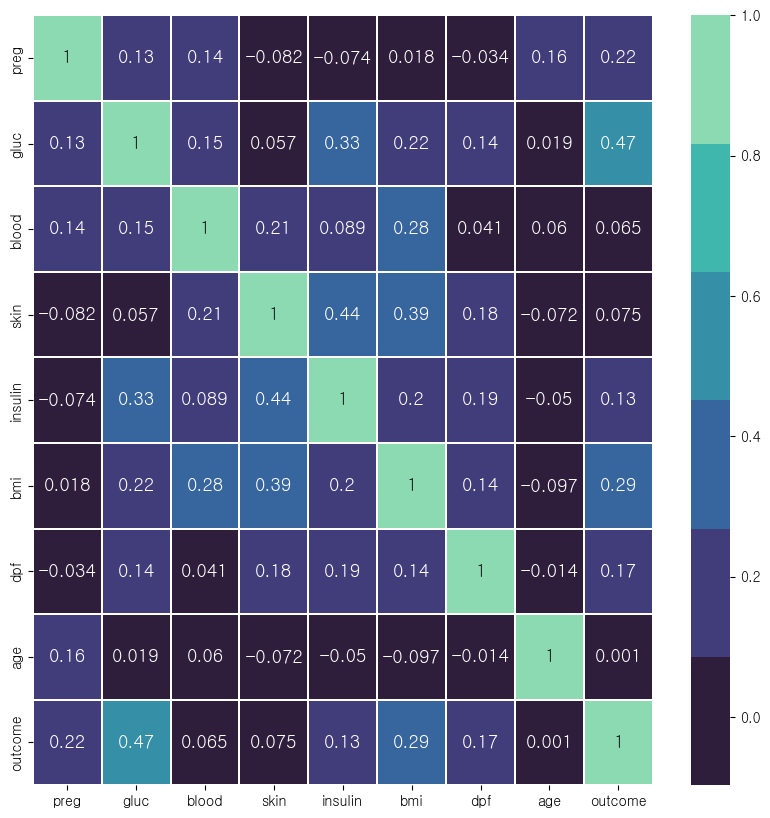

In [63]:
plt.figure(figsize = (10, 10))

my_color = sns.color_palette('mako')
sns.heatmap(dia.corr(), vmax = 1
            , annot = True, annot_kws = {'size' : 13}
            , linecolor = 'white', linewidth = 0.1, cmap = my_color)


In [ ]:
# 그룹별로 다시 상관관계 분석을 실행해보자.

In [ ]:
# 그룹별 군집화 실시

In [5]:
import os

os.getcwd()

'C:\\Users\\lsc\\Desktop\\ADP\\ADP_study\\3주차\\hyejoo'

In [7]:
import pandas as pd

metal = pd.read_csv('C:/Users/lsc/Desktop/ADP/ADP_20230521/metalicity')

In [8]:
metal

,metalicity
0,42.731551
1,46.429668
2,45.754023
3,45.808060
4,44.072529
...,...
145,45.915727
146,45.277868
147,45.082157
148,44.297235
